# Loading packages and datasources

In [1]:
using Monkeypox
using Optim
using Optimization
using Plots
using Turing
using StatsPlots
using BSON:@save,@load
countryarray = ["United States", "Spain", "Germany", "United Kingdom", "France", "Brazil", "Canada", "Netherlands"]
poparray = [329500000.0, 47350000.0, 83240000.0, 55980000.0, 67390000.0, 212600000.0, 38010000.0, 17440000.0]
url = "./data/timeseries-country-confirmed.csv"

"./data/timeseries-country-confirmed.csv"

# Bayesian inference

In [2]:
function runinference!(i,country)
data_on, acc, cases, datatspan, datadate = datasource!(url, country)
bar(datadate,acc[datatspan],label="Accumulated cases",title = country)
savefig("./output/accdata$i.png")
bar(datadate, cases[datatspan], label="Daily cases", title=country)
savefig("./output/dailydata$i.png")
N = poparray[i] # population
θ = [0.3, 0.3, 0.2, 0.1, 0.7, 0.01]# ρ,σ,h,α
pknown = [0.0, 0.0, 1 / 30, 1.0] # B,μ,δ,ϕ
lb = [0.0001, 0.0001, 0, 0.0001, 0.0001, 0.0]
ub = [1.0, 1.0, 1.0, 1.0, 1.0, 0.1]
alg = Optim.NelderMead()
p_min = controlmonkeypoxopt!(N, θ, acc, cases, datatspan, pknown, lb, ub, alg)
chainout = controlmonkeypoxinference!(N, p_min, acc, cases, datatspan, pknown, lb, ub)
@save "chain$i.bason" chainout
println(country, "data parameter:", chainout[2])
prob_pred = controlmonkeypoxprob!(N, θ, acc, pknown)
prediction = controlsimulate!(prob_pred, N, p_min, datatspan, pknown)
scatter(datadate, acc[datatspan], label="Training data")
display(plot!(datadate, prediction[10, :], label="Real accumulated cases"))
savefig("./output/controlacc$i.png")
#plot(datadate, prediction[2, :])
#display(plot(chainout[1]))
datatspan1 = 0:length(acc)-1
prediction1 = controlsimulate!(prob_pred, N, p_min, datatspan1, pknown)
mid = zeros(length(acc))
mid[2:end] = prediction1[10, 1:end-1]
pred_daily = prediction1[10, :] - mid
scatter(datadate, cases[datatspan], label="Training data")
display(plot!(datadate, pred_daily[datatspan], label="Daily cases", title=country))
savefig("./output/controldaily$i.png")
#plot(datadate, prediction[2, :])
display(plot(chainout[1]))
savefig("./output/controlchain$i.png")
end

runinference! (generic function with 1 method)

┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC F:\Code\Julia\Julia-1.6.2\jpkgs\.julia\packages\AdvancedHMC\51xgc\src\hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC F:\Code\Julia\Julia-1.6.2\jpkgs\.julia\packages\AdvancedHMC\51xgc\src\hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC F:\Code\Julia\Julia-1.6.2\jpkgs\.julia\packages\AdvancedHMC\51xgc\src\hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC F:\Code\Julia\Julia-1.6.2\jpkgs\.julia\packages\AdvancedHMC\51xgc\src\hamiltonian.jl:47
┌ Warning: The current proposal will be 

Spaindata parameter:[0.2357101073706539, 0.9265260595756976, 0.032944790572530844, 0.2000172806188044, 0.8000103581992477, 0.09999101012792963]


┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC F:\Code\Julia\Julia-1.6.2\jpkgs\.julia\packages\AdvancedHMC\51xgc\src\hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC F:\Code\Julia\Julia-1.6.2\jpkgs\.julia\packages\AdvancedHMC\51xgc\src\hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC F:\Code\Julia\Julia-1.6.2\jpkgs\.julia\packages\AdvancedHMC\51xgc\src\hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC F:\Code\Julia\Julia-1.6.2\jpkgs\.julia\packages\AdvancedHMC\51xgc\src\hamiltonian.jl:47
┌ Warning: The current proposal will be 

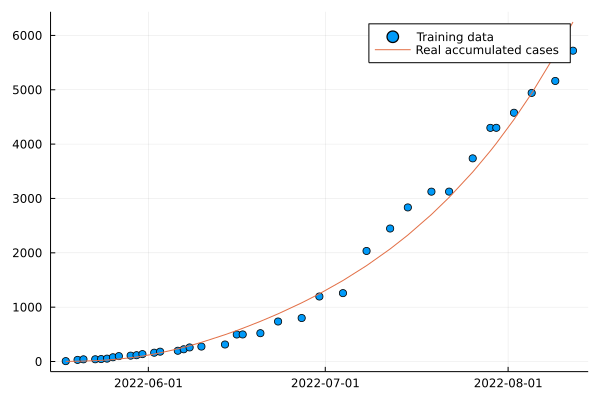

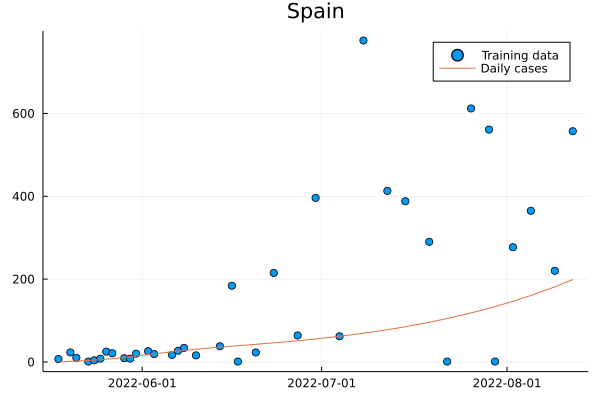

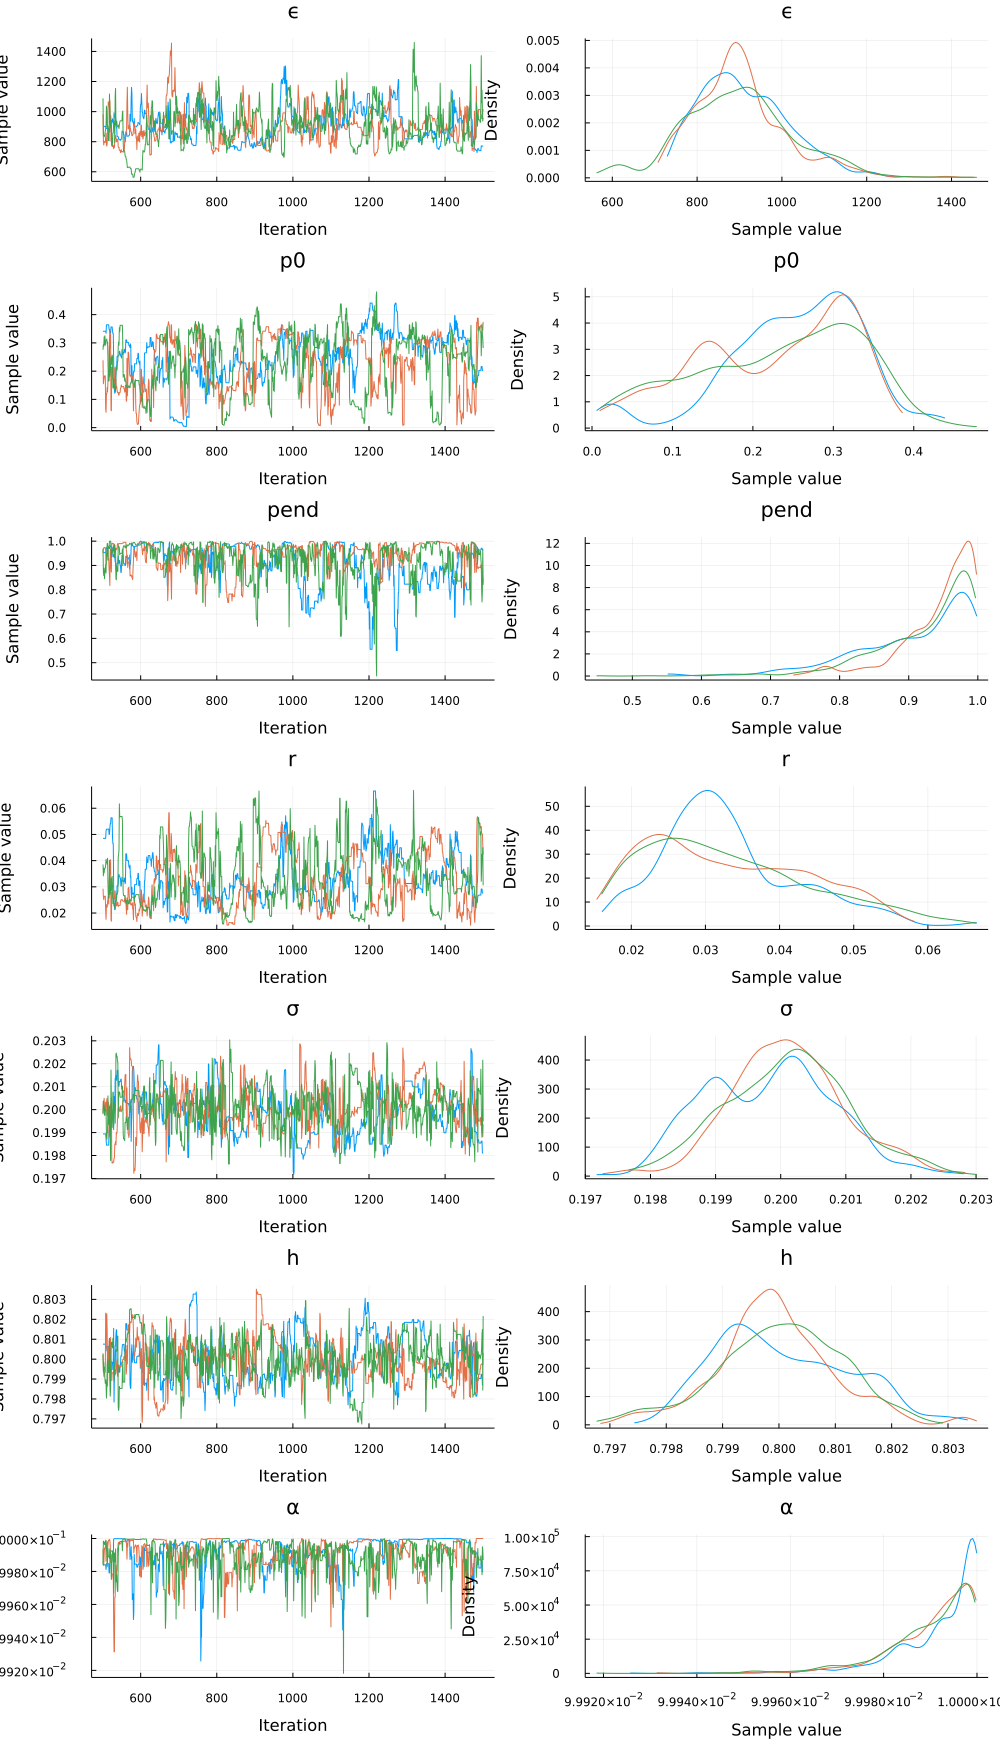

In [4]:
runinference!(2,"Spain")

┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC F:\Code\Julia\Julia-1.6.2\jpkgs\.julia\packages\AdvancedHMC\51xgc\src\hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC F:\Code\Julia\Julia-1.6.2\jpkgs\.julia\packages\AdvancedHMC\51xgc\src\hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC F:\Code\Julia\Julia-1.6.2\jpkgs\.julia\packages\AdvancedHMC\51xgc\src\hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC F:\Code\Julia\Julia-1.6.2\jpkgs\.julia\packages\AdvancedHMC\51xgc\src\hamiltonian.jl:47
┌ Warning: The current proposal will be 

Germanydata parameter:[0.04063883415456997, 0.9747231538944662, 0.02344399979330142, 0.2005400261965933, 0.7998546739500653, 0.09999097112565869]


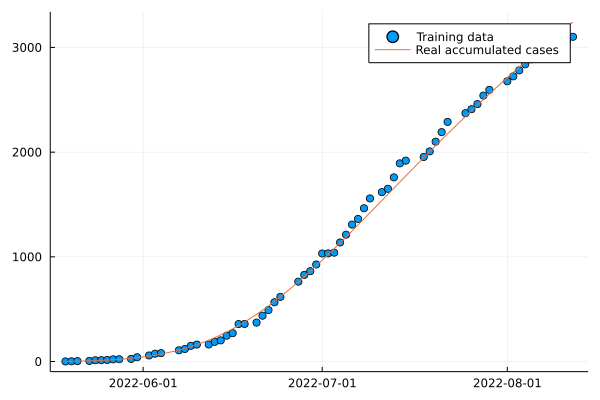

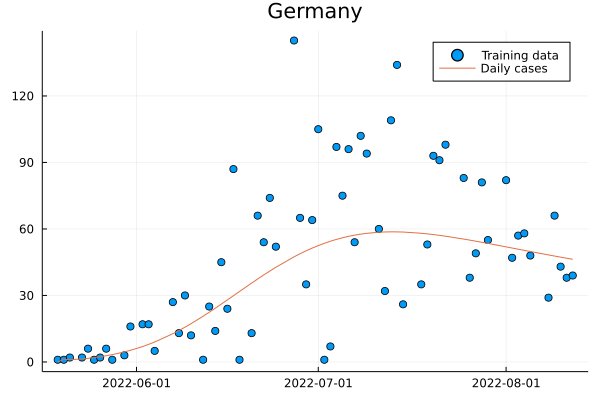

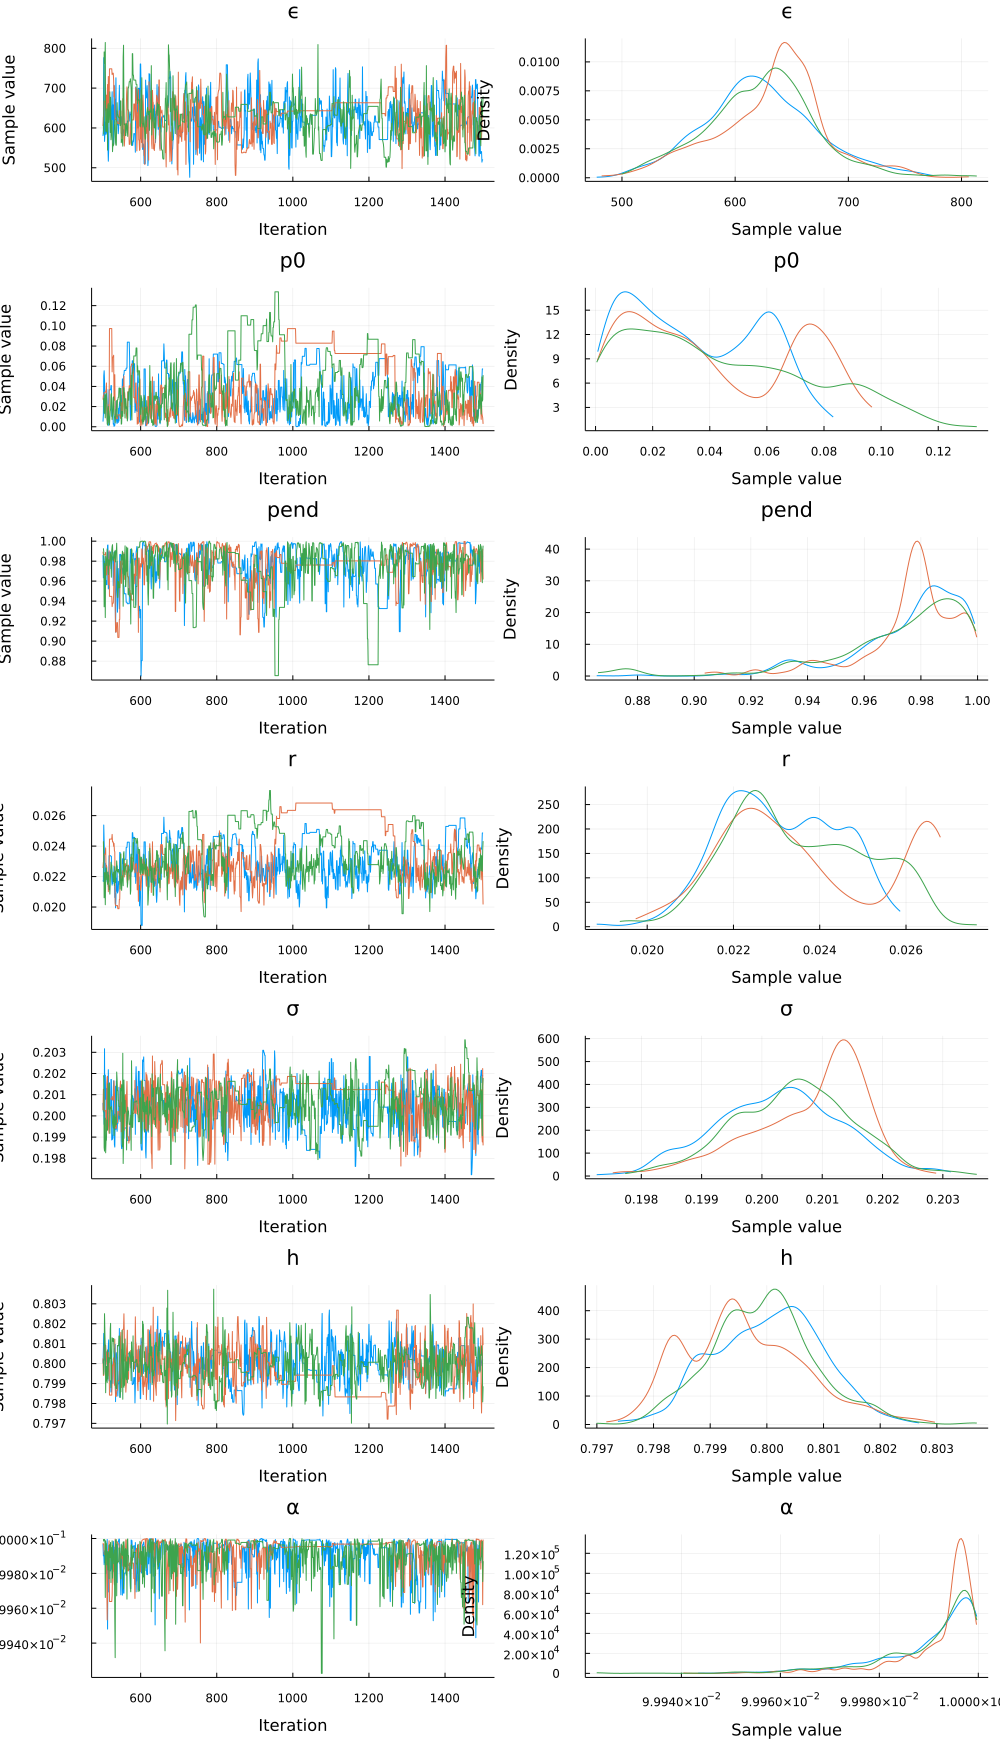

In [5]:
runinference!(3,"Germany")

┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC F:\Code\Julia\Julia-1.6.2\jpkgs\.julia\packages\AdvancedHMC\51xgc\src\hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC F:\Code\Julia\Julia-1.6.2\jpkgs\.julia\packages\AdvancedHMC\51xgc\src\hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC F:\Code\Julia\Julia-1.6.2\jpkgs\.julia\packages\AdvancedHMC\51xgc\src\hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC F:\Code\Julia\Julia-1.6.2\jpkgs\.julia\packages\AdvancedHMC\51xgc\src\hamiltonian.jl:47
┌ Warning: The current proposal will be 

United Kingdomdata parameter:[0.023696803929567908, 0.9705830900936147, 0.02579558522644399, 0.20035856005760563, 0.799982920442043, 0.09998963925806316]


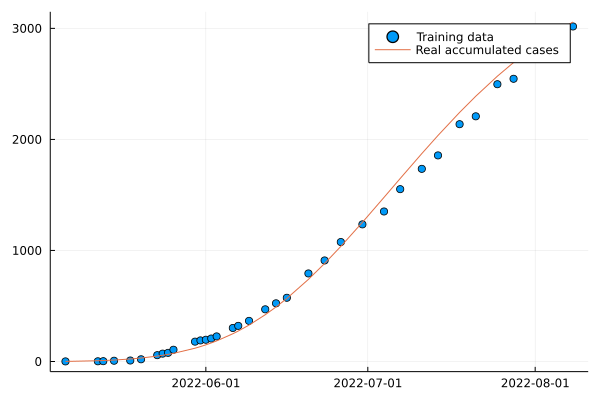

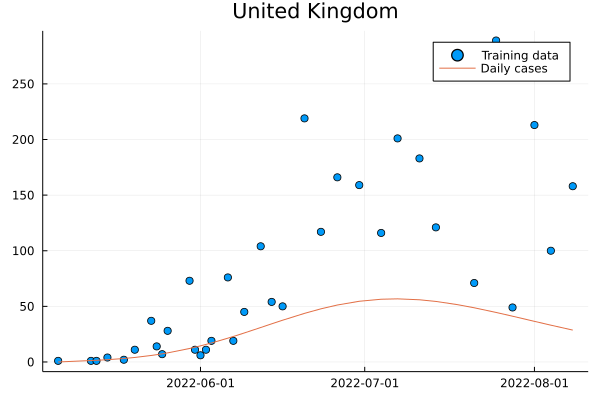

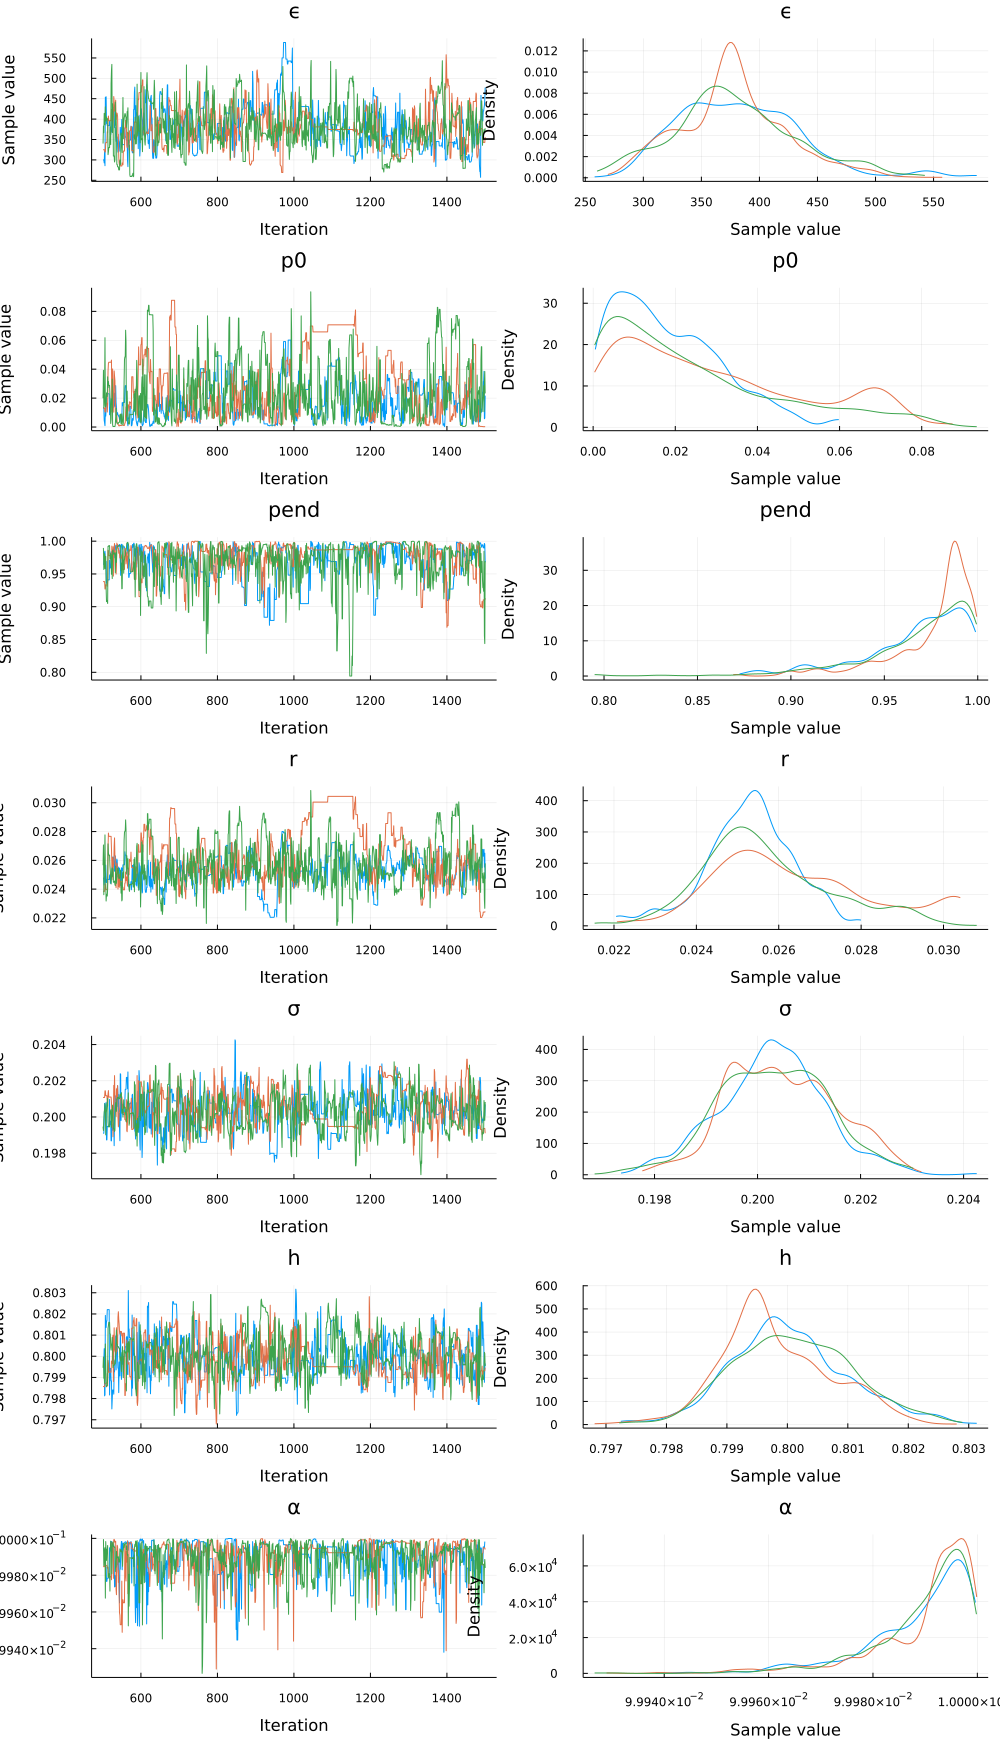

In [8]:
runinference!(4,"United Kingdom")

┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC F:\Code\Julia\Julia-1.6.2\jpkgs\.julia\packages\AdvancedHMC\51xgc\src\hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC F:\Code\Julia\Julia-1.6.2\jpkgs\.julia\packages\AdvancedHMC\51xgc\src\hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC F:\Code\Julia\Julia-1.6.2\jpkgs\.julia\packages\AdvancedHMC\51xgc\src\hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC F:\Code\Julia\Julia-1.6.2\jpkgs\.julia\packages\AdvancedHMC\51xgc\src\hamiltonian.jl:47
┌ Warning: The current proposal will be 

Francedata parameter:[0.04970519963241961, 0.968453096574059, 0.025636257388338125, 0.200545287877091, 0.7999621980445012, 0.09998828638066984]


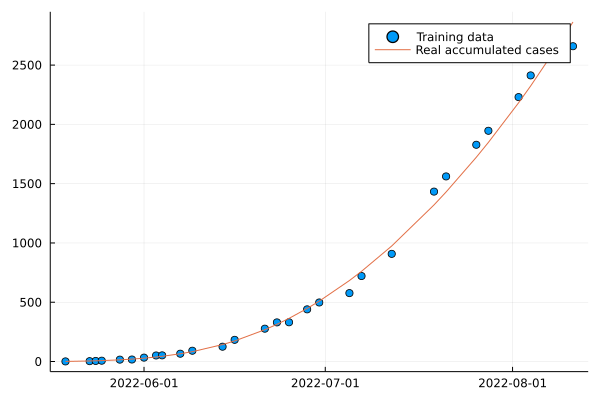

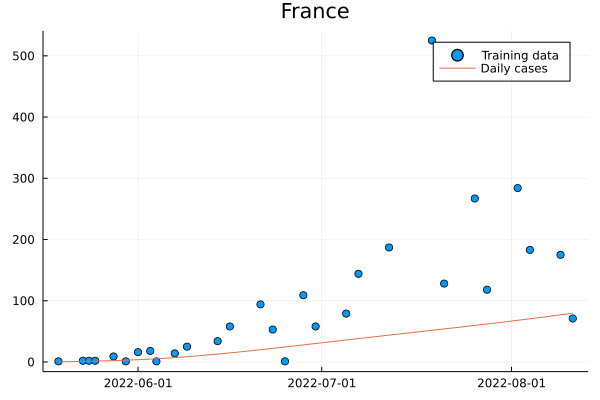

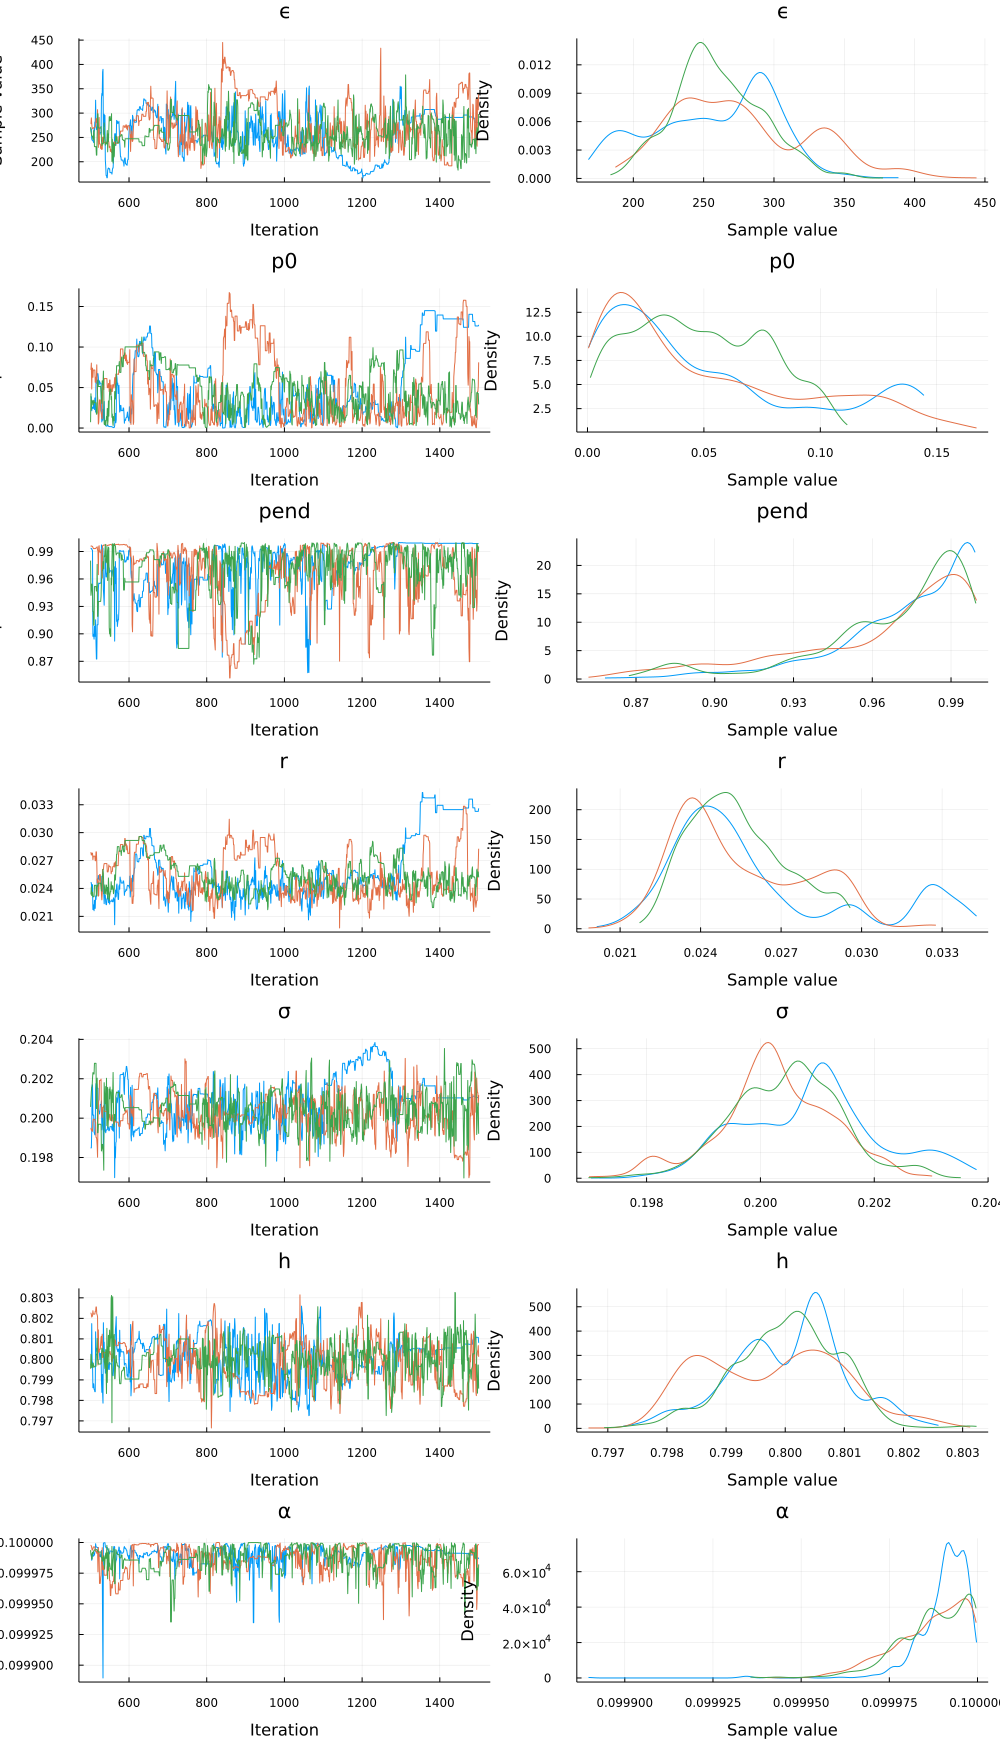

In [9]:
runinference!(5,"France")

┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC F:\Code\Julia\Julia-1.6.2\jpkgs\.julia\packages\AdvancedHMC\51xgc\src\hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC F:\Code\Julia\Julia-1.6.2\jpkgs\.julia\packages\AdvancedHMC\51xgc\src\hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC F:\Code\Julia\Julia-1.6.2\jpkgs\.julia\packages\AdvancedHMC\51xgc\src\hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC F:\Code\Julia\Julia-1.6.2\jpkgs\.julia\packages\AdvancedHMC\51xgc\src\hamiltonian.jl:47
┌ Warning: The current proposal will be 

Brazildata parameter:[0.3646103790609926, 0.9705838416392443, 0.028963225584100943, 0.20027427933962277, 0.8000357779341636, 0.09999027839941531]


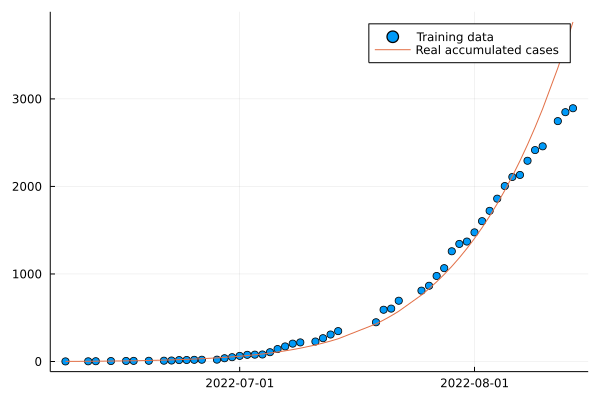

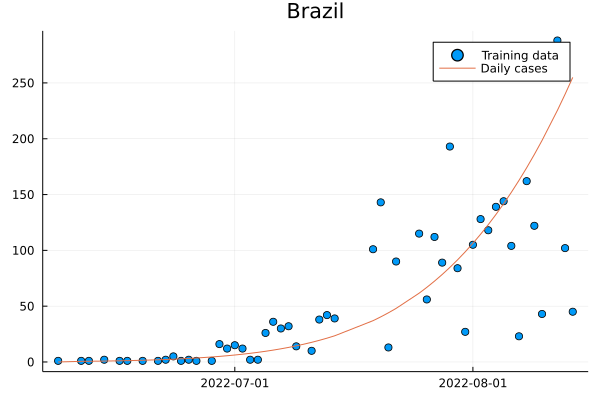

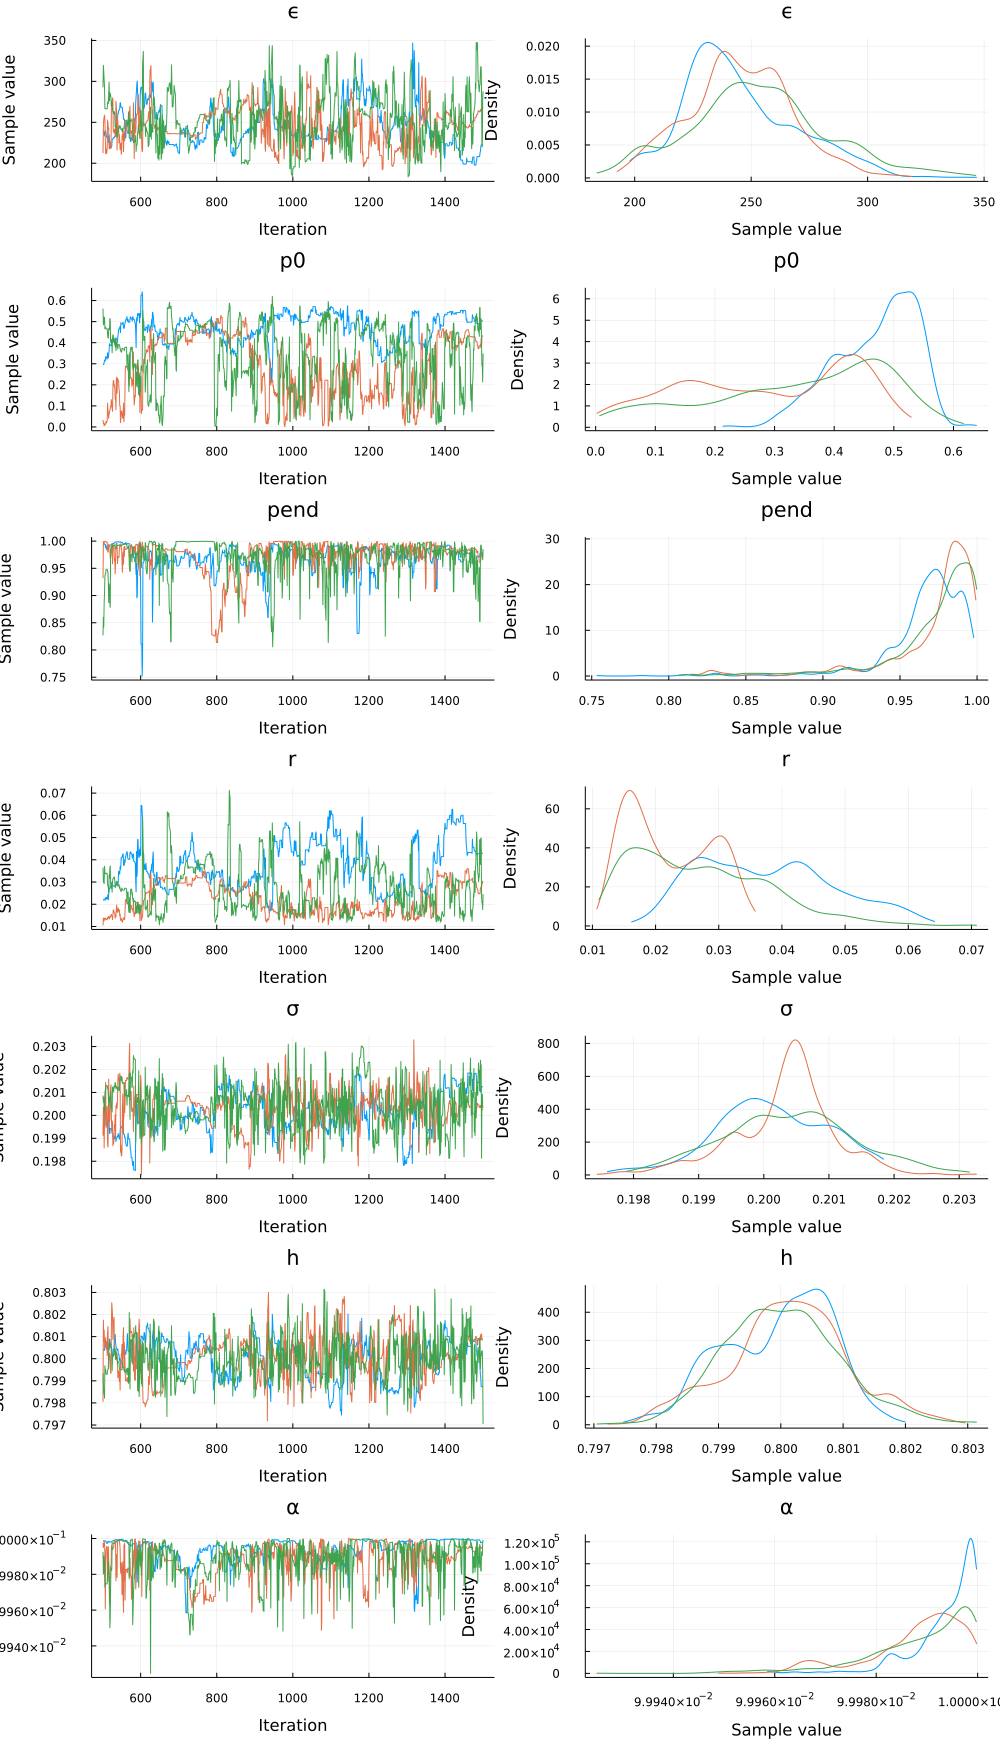

In [10]:
runinference!(6,"Brazil")

┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC F:\Code\Julia\Julia-1.6.2\jpkgs\.julia\packages\AdvancedHMC\51xgc\src\hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC F:\Code\Julia\Julia-1.6.2\jpkgs\.julia\packages\AdvancedHMC\51xgc\src\hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC F:\Code\Julia\Julia-1.6.2\jpkgs\.julia\packages\AdvancedHMC\51xgc\src\hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC F:\Code\Julia\Julia-1.6.2\jpkgs\.julia\packages\AdvancedHMC\51xgc\src\hamiltonian.jl:47
┌ Warning: The current proposal will be 

Canadadata parameter:[0.00624993945652688, 0.9690961221088602, 0.030871294312658896, 0.20041287172585634, 0.8001831237862482, 0.0999893254422686]


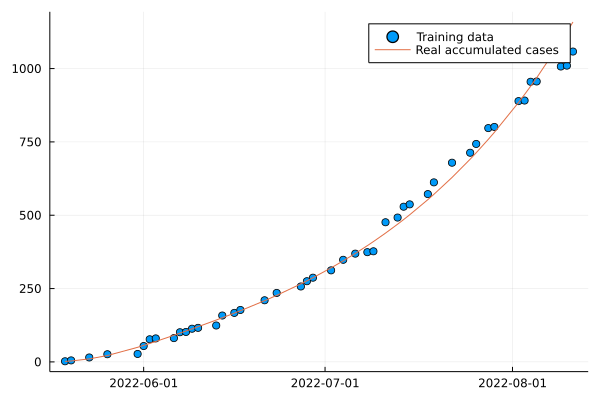

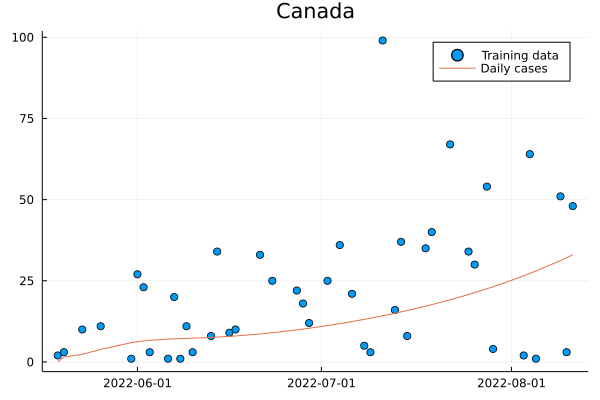

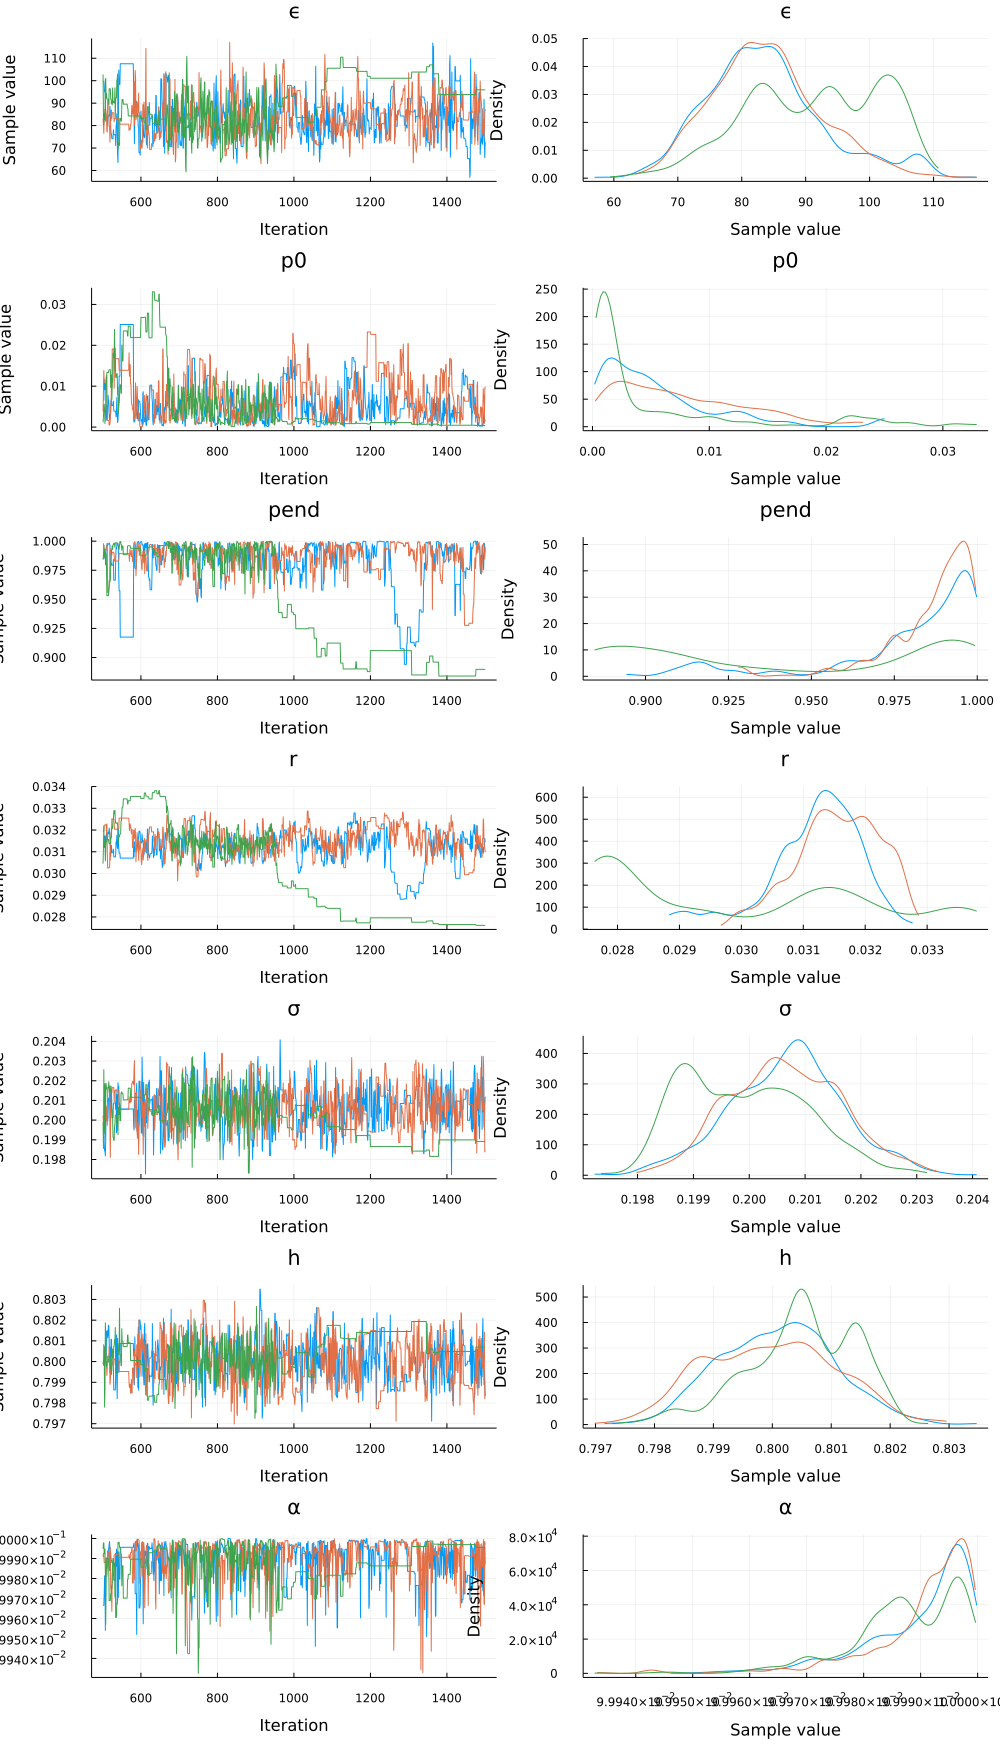

In [11]:
runinference!(7,"Canada")

┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC F:\Code\Julia\Julia-1.6.2\jpkgs\.julia\packages\AdvancedHMC\51xgc\src\hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC F:\Code\Julia\Julia-1.6.2\jpkgs\.julia\packages\AdvancedHMC\51xgc\src\hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC F:\Code\Julia\Julia-1.6.2\jpkgs\.julia\packages\AdvancedHMC\51xgc\src\hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC F:\Code\Julia\Julia-1.6.2\jpkgs\.julia\packages\AdvancedHMC\51xgc\src\hamiltonian.jl:47
┌ Warning: The current proposal will be 

Netherlandsdata parameter:[0.014979856644645453, 0.9720693210761644, 0.031174950288417724, 0.20030281991185864, 0.8000485236303658, 0.09998992752056612]


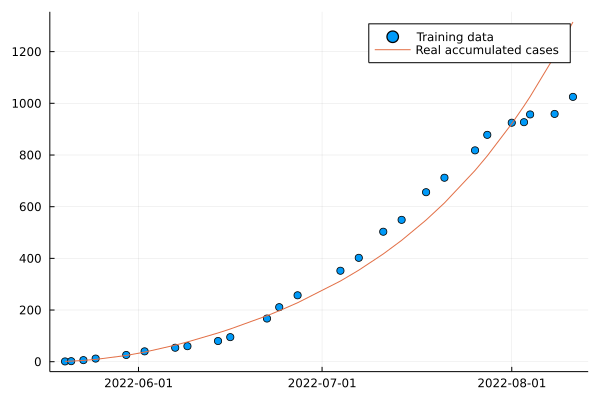

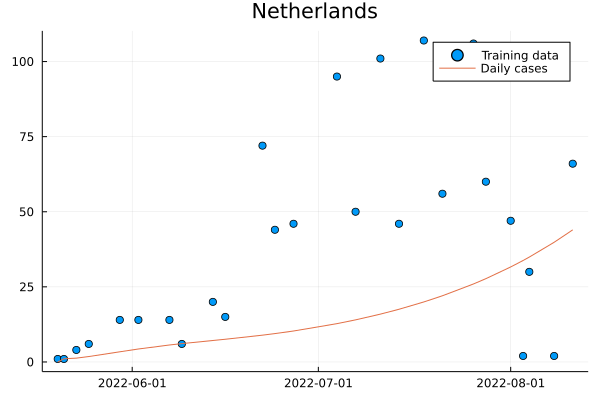

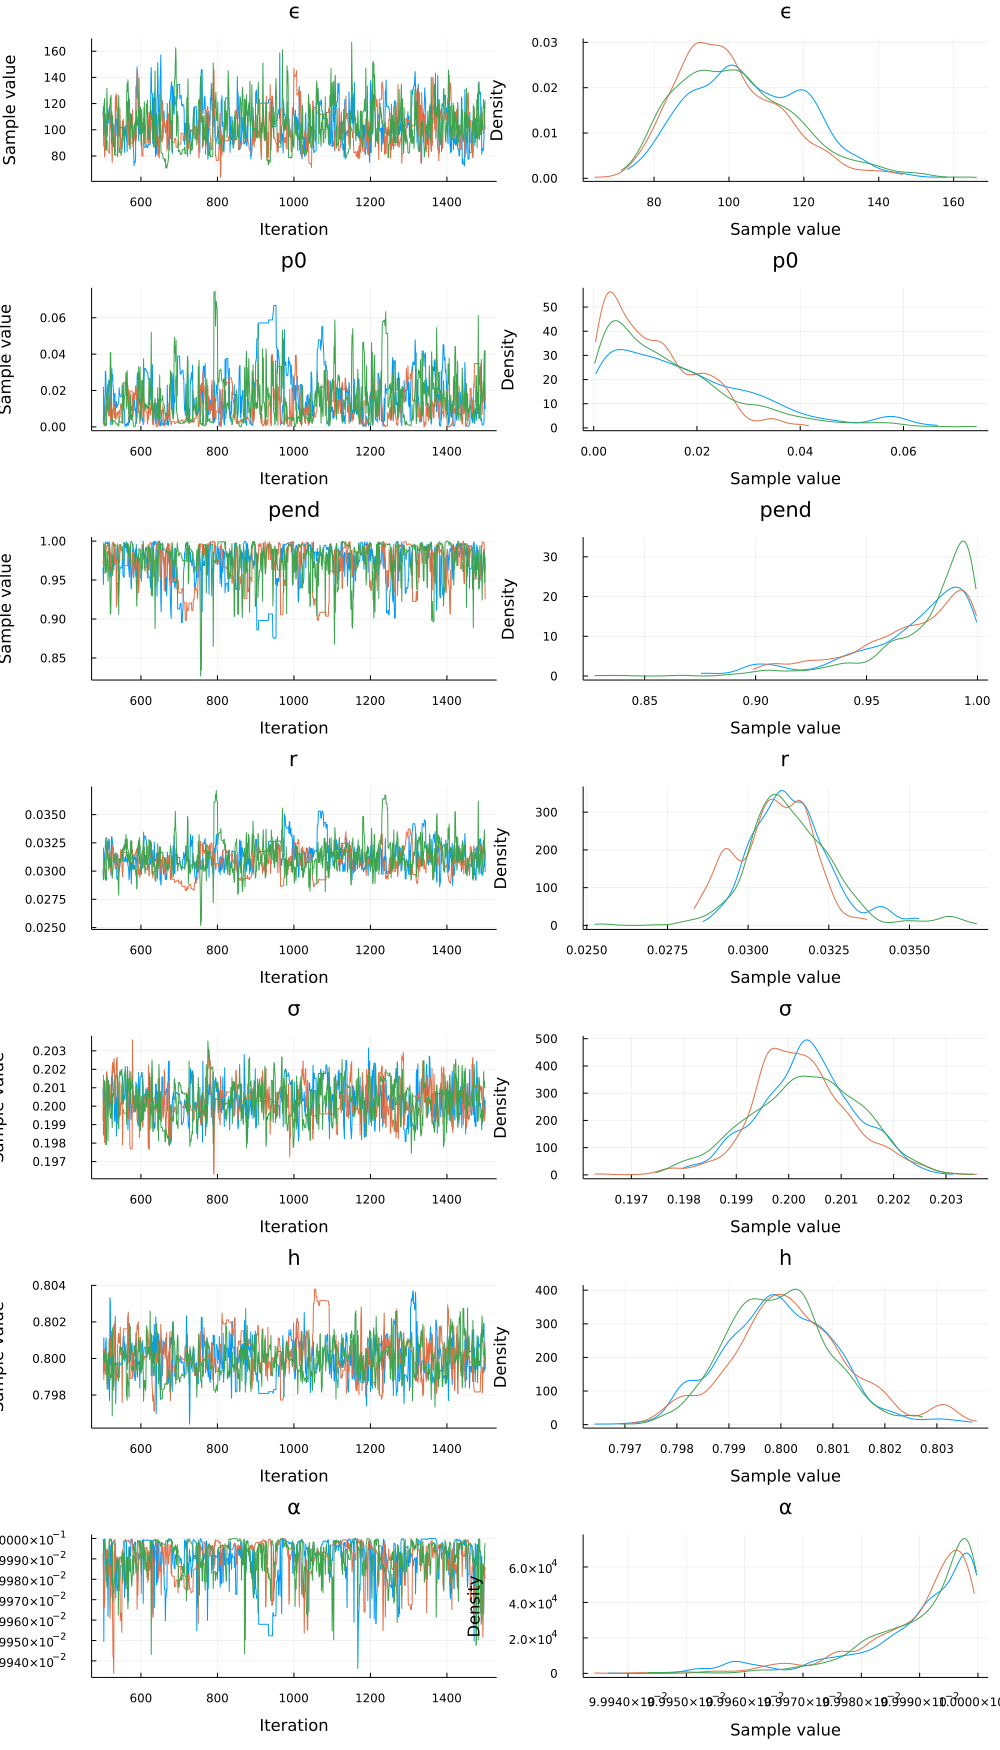

In [12]:
runinference!(8,"Netherlands")